In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data_df = pd.read_csv('data/exames.csv')
data_df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [4]:
SEED = 42
np.random.seed(SEED)

In [5]:
X = data_df.drop(columns=['id', 'diagnostico'])
Y = data_df['diagnostico']

X_v1 = X.drop(columns=['exame_33'])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_v1, Y, test_size=0.3, stratify=Y)

## Baseline

#### RandomForestClassifier

In [7]:
baseline_clf_1 = RandomForestClassifier(n_estimators=100)
baseline_clf_1.fit(X_train, Y_train)

print('Baseline RandomForest score: %.2f%%' % (baseline_clf_1.score(X_test, Y_test) * 100.0))

Baseline RandomForest score: 96.49%


#### Dummy Most Frequent

In [8]:
baseline_clf_2 = DummyClassifier(strategy='most_frequent')
baseline_clf_2.fit(X_train, Y_train)

print('Baseline Dummy score: %.2f%%' % (baseline_clf_2.score(X_test, Y_test) * 100.0))

Baseline Dummy score: 62.57%


## Visualizations

In [9]:
scaler = StandardScaler()
X_v2 = scaler.fit_transform(X_v1)
X_v2 = pd.DataFrame(data=X_v2, columns=X_v1.keys())

In [10]:
def plot_violin(values, begin, end):
    data_plot = pd.concat([values.iloc[:,begin:end], Y], axis=1)
    data_plot = pd.melt(data_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

    plt.figure(figsize=(10, 10))
    sns.violinplot(x='exames', y='valores', hue='diagnostico', data=data_plot, split=True)

    plt.xticks(rotation=90)

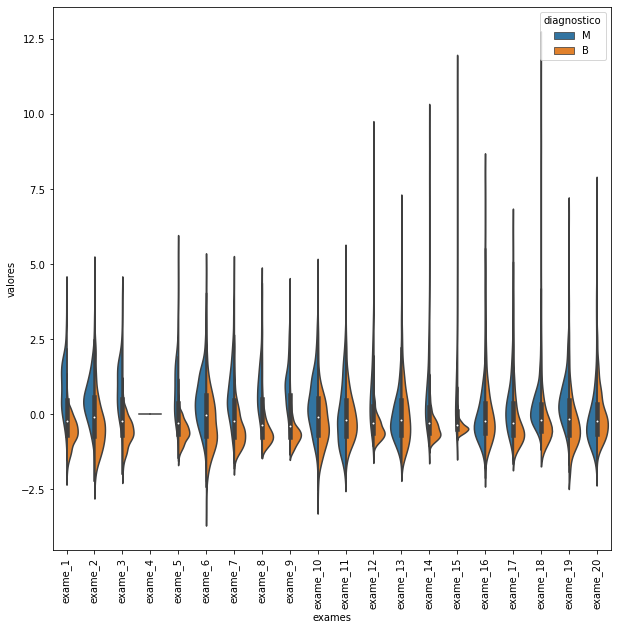

In [11]:
plot_violin(X_v2, 0, 20)

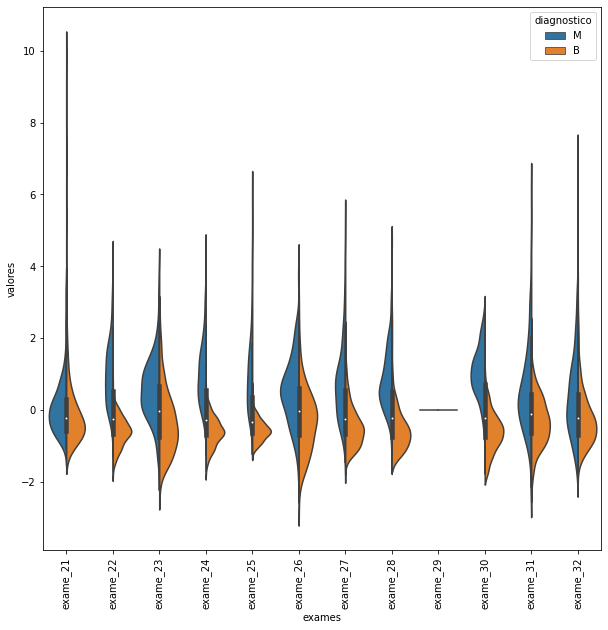

In [12]:
plot_violin(X_v2, 20, 40)

In [13]:
X_v3 = X_v2.drop(columns=['exame_4', 'exame_29'])

In [14]:
def clf_predict(data, clf=RandomForestClassifier(n_estimators=100), name='RandomForest'):
    SEED = 42
    np.random.seed(SEED)
    
    X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.3, stratify=Y)
    clf.fit(X_train, Y_train)

    print('Baseline %s score: %.2f%%' % (name, clf.score(X_test, Y_test) * 100.0))

In [15]:
clf_predict(X_v3)

Baseline RandomForest score: 96.49%


<AxesSubplot:>

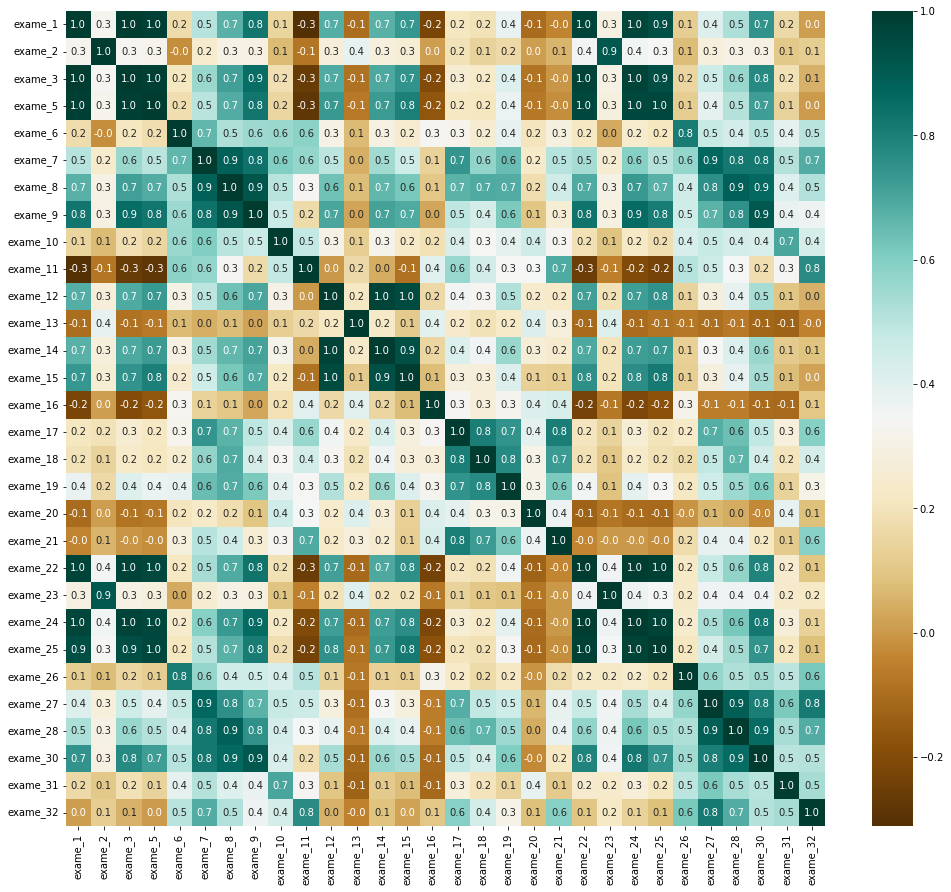

In [16]:
corr_matrix = X_v3.corr()

plt.figure(figsize=(17, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='BrBG')

In [17]:
corr_matrix_v1 = corr_matrix[corr_matrix > 0.99]
corr_matrix_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
corr_matrix_v2 = corr_matrix_v1.sum()
correlated_vars = corr_matrix_v2[corr_matrix_v2 > 1]
correlated_vars

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [19]:
X_v4 = X_v3.drop(columns=['exame_3', 'exame_24'])

In [20]:
X_v4.columns

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_11', 'exame_12', 'exame_13', 'exame_14',
       'exame_15', 'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20',
       'exame_21', 'exame_22', 'exame_23', 'exame_25', 'exame_26', 'exame_27',
       'exame_28', 'exame_30', 'exame_31', 'exame_32'],
      dtype='object')

In [21]:
clf_predict(X_v4)

Baseline RandomForest score: 98.25%


In [22]:
select_features = SelectKBest(chi2, k=5)

In [23]:
X_v5 = X_v1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

SEED = 42
np.random.seed(SEED)

X_train, X_test, Y_train, Y_test = train_test_split(X_v5, Y, test_size=0.3, stratify=Y)
select_features.fit(X_train, Y_train)

kbest_train = select_features.transform(X_train)
kbest_test = select_features.transform(X_test)

In [24]:
kbest_train.shape

(398, 5)

In [25]:
clf = RandomForestClassifier(n_estimators=100, random_state=SEED)
clf.fit(kbest_train, Y_train)

print('Baseline RandomForest score: %.2f%%' % (clf.score(kbest_test, Y_test) * 100.0))

Baseline RandomForest score: 92.40%


[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

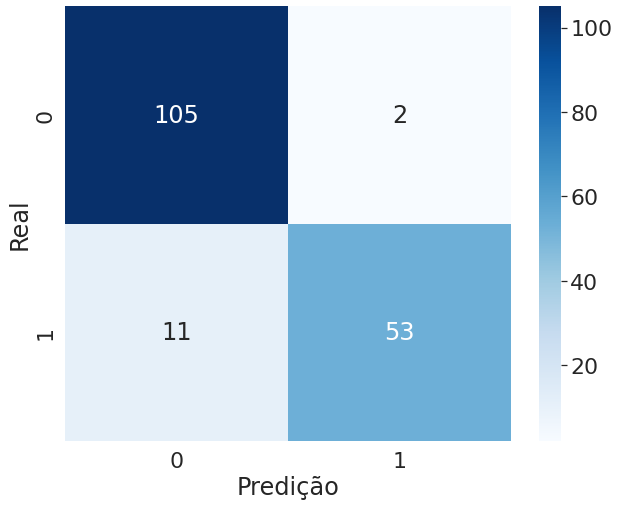

In [26]:
y_pred = clf.predict(kbest_test)
cf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues').set(xlabel='Predição', ylabel='Real')

In [27]:
SEED = 42
np.random.seed(SEED)

X_train, X_test, Y_train, Y_test = train_test_split(X_v5, Y, test_size=0.3, stratify=Y)

clf = RandomForestClassifier(n_estimators=100)

rfe_select = RFE(estimator=clf, n_features_to_select=2, step=1)
rfe_select.fit(X_train, Y_train)

rfe_train = rfe_select.transform(X_train)
rfe_test = rfe_select.transform(X_test)

clf.fit(rfe_train, Y_train)

print('Baseline RandomForest score: %.2f%%' % (clf.score(rfe_test, Y_test) * 100.0))

Baseline RandomForest score: 92.98%


[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

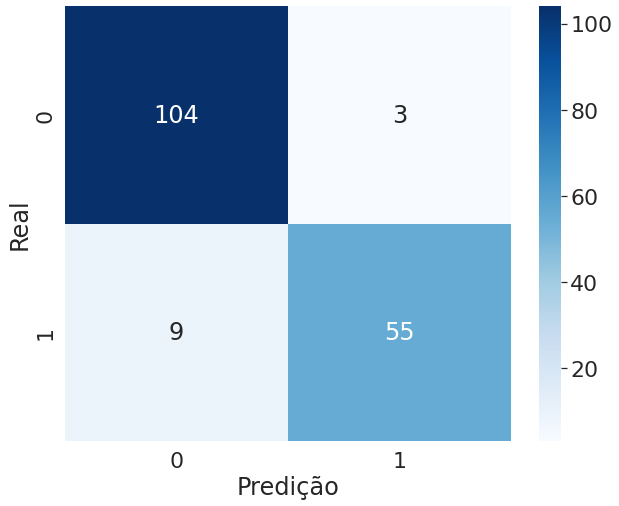

In [28]:
y_pred = clf.predict(rfe_test)
cf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues').set(xlabel='Predição', ylabel='Real')

In [29]:
SEED = 42
np.random.seed(SEED)

X_train, X_test, Y_train, Y_test = train_test_split(X_v5, Y, test_size=0.3, stratify=Y)

clf = RandomForestClassifier(n_estimators=100)

rfecv_select = RFECV(estimator=clf, cv=5, step=1, scoring='accuracy')
rfecv_select.fit(X_train, Y_train)

rfecv_train = rfecv_select.transform(X_train)
rfecv_test = rfecv_select.transform(X_test)

clf.fit(rfecv_train, Y_train)

print('Baseline RandomForest score: %.2f%%' % (clf.score(rfecv_test, Y_test) * 100.0))

Baseline RandomForest score: 98.25%


[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

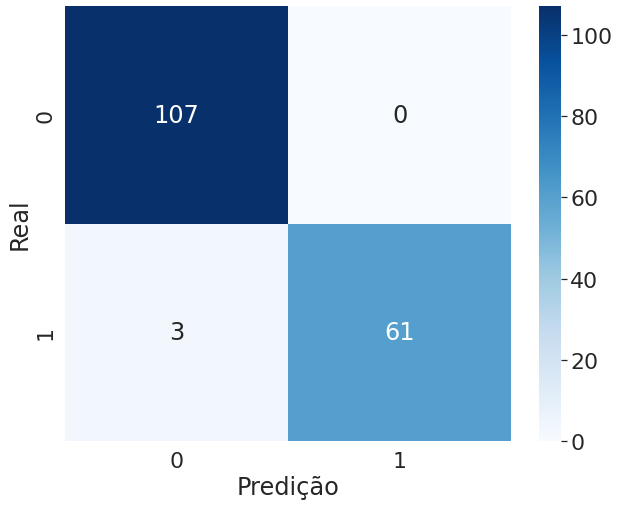

In [30]:
y_pred = clf.predict(rfecv_test)
cf_matrix = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues').set(xlabel='Predição', ylabel='Real')

In [31]:
rfecv_select.n_features_

17

In [32]:
X_train.columns[rfecv_select.support_]
grid_scores = rfecv_select.grid_scores_.mean(axis=1)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


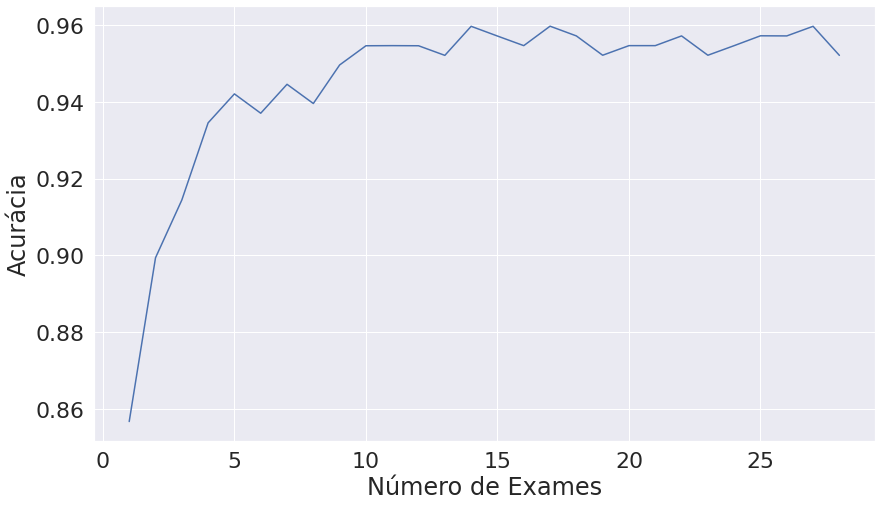

In [33]:
plt.figure(figsize=(14, 8))
plt.xlabel('Número de Exames')
plt.ylabel('Acurácia')
plt.plot(range(1, len(grid_scores) + 1), grid_scores)
plt.show()

In [34]:
X_v6 = rfe_select.transform(X_v5)
X_v6.shape

(569, 2)

<AxesSubplot:>

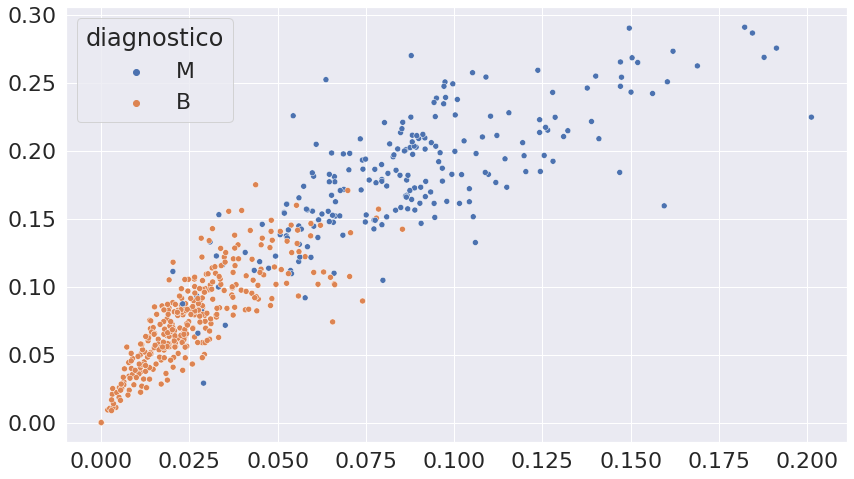

In [35]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=X_v6[:,0], y=X_v6[:,1], hue=Y)

In [36]:
pca = PCA(n_components=2)
X_v7 = pca.fit_transform(X_v4)

In [37]:
X_v7.shape

(569, 2)

<AxesSubplot:>

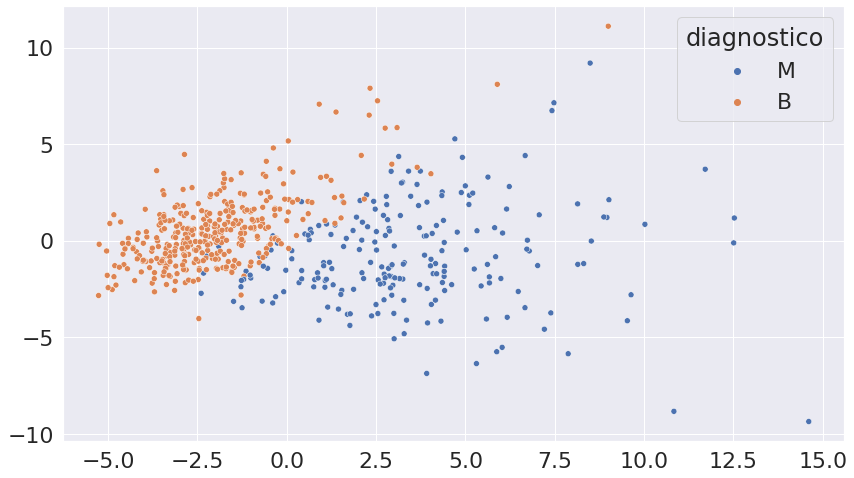

In [38]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=X_v7[:,0], y=X_v7[:,1], hue=Y)

In [39]:
tsne = TSNE(n_components=2)
X_v8 = tsne.fit_transform(X_v4)

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [40]:
X_v8.shape

(569, 2)

<AxesSubplot:>

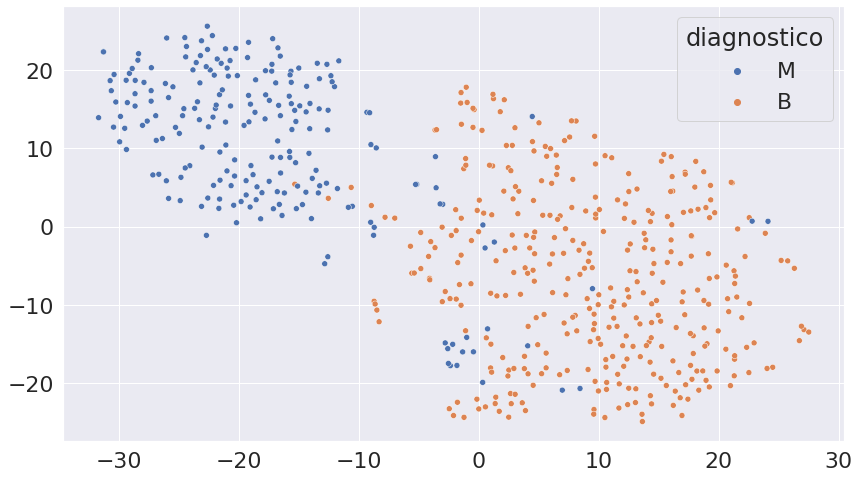

In [41]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=X_v8[:,0], y=X_v8[:,1], hue=Y)